<b><font size = 4> Option Volatility & Pricing - Advanced Trading Strategies and Techniques - Sheldon Natenberg <font></b>

In [1]:
#Importation des librairies et modules

import pandas as pd
import numpy as np
import math
from math import pi
from math import e
from math import sqrt
from math import log
from math import exp
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

<b><u><font size = 3> Chapter 2 - Forward Pricing <font></u></b>

<b> forward price = current cash price + costs of buying now - benefits of buying now </b>

<u> Physical Commodities </u>

In [2]:
#C = cash commodity price
#F = forward commodity price
#t = time to maturity of the forward contract
#r = interest rate
#s = annual storage costs per commodity unit
#i = annual insurance costs per commodity unit

In [3]:
def commodity_forward_price(C, t, r, s, i):

    result = C * (1 + r * t) + (s * t) + (i * t)
    
    return result

In [4]:
def implied_commodity_cash_price(F, t, r, s, i):
    
    C = (F - (s + i) * t) / (1 + r * t)
    
    result = C
    
    return result

<u> Stocks </u>

In [5]:
#S = cash stock price
#F = forward stock price
#t = time to maturity of the forward contract
#r = interest rate over the life of the contract
#D = all the dividends expected over the life of the forward contract (ignoring interest that can be earned on them) or divedend yield scaled by the time period

In [6]:
def stock_forward_price(S, t, r, D):

    result = S * (1 + r * t) - D
    
    return result

In [7]:
def implied_stock_cash_price(F, t, r, D):
    
    S = (F + D) / (1 + r * t)
    
    result = S
    
    return result

<u> FX </u>

In [8]:
#S = currency spot (Domestic by Foreign)
#F = forward currency price
#t = time to maturity of the forward contract
#rd = interest rate over the life of the contract of the domestic currency
#rf = interest rate over the life of the contract of the foreign currency

In [9]:
def fx_forward_price(S, t, rd, rf):

    result = S * ((1 + rd * t) / (1 + rf * t))
    
    return result

<u> Cash-and-Carry arbitrage / reverse Cash-and-Carry arbitrage (with short-selling) </u>

In [12]:
def cc_rcc_arbitrage(direction, S, F, t, rl, rs, D):
    
    if direction == "normal":
        
        result = F - (S * (1 + rl * t) - D)
        
    elif direction == "reverse":
        
        result = (S * (1 + rs * t) - D) - F
        
    return result

In [13]:
def is_cc_or_rcc_arbitrage_possible(S, F, t, rl, rs, D):
    
    if F > (S * (1 + rl * t) - D):
        
        result = "A normal cash and carry is possible. The Forward price breakeven is : " +  str(round((S * (1 + rl * t) - D), 2)) + \
        ". " + "The profit from the operation is : " + str(round(F - (S * (1 + rl * t) - D), 2)) + "."
        
        
    elif F < (S * (1 + rs * t) - D):
        
        result = "A reverse cash and carry is possible. The Forward price breakeven is : " + str(round((S * (1 + rs * t) - D), 2)) + \
        ". " + "The profit from the operation is : " + str(round((S * (1 + rs * t) - D) - F, 2)) + "."
    
    else:
    
        result = "No reverse Cash-and-Carry nor Reverse Cash-and-Carry are possible."
    
    return result

<u> Payoffs Basic Options Strategies </u>

In [14]:
#Long Call without premium

def long_call(S, K):
    
    if S > K :
        
        result = S - K
        
    else:
        
        result = 0
        
    return result

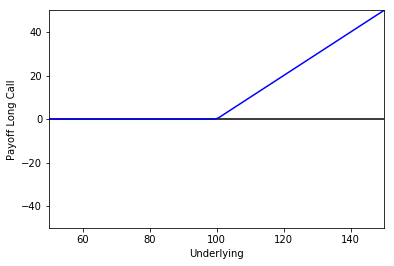

In [15]:
K = 100

x = np.linspace(K - 50, K + 50, 100)

R_payoff = [long_call(i, K) for i in x]

R_abscisse = [0 for i in x]

plt.plot(x, R_abscisse, "k")
plt.plot(x, R_payoff, "b")
plt.ylabel("Payoff Long Call")
plt.xlabel("Underlying")
plt.axis([K - 50, K + 50, -50, 50])
plt.show()

In [16]:
#Long Put without premium

def long_put(S, K):
    
    if S < K :
        
        result = K - S
    
    else:
        
        result = 0
        
    return result

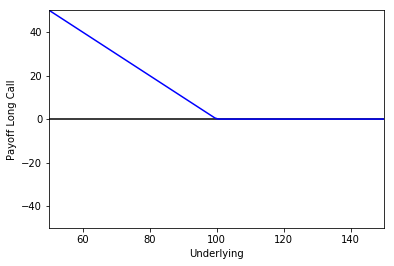

In [17]:
K = 100

x = np.linspace(K - 50, K + 50, 100)

R_payoff = [long_put(i, K) for i in x]

R_abscisse = [0 for i in x]

plt.plot(x, R_abscisse, "k")
plt.plot(x, R_payoff, "b")
plt.ylabel("Payoff Long Call")
plt.xlabel("Underlying")
plt.axis([K - 50, K + 50, -50, 50])
plt.show()

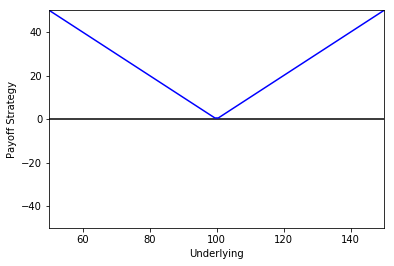

In [18]:
#Payoff Long Straddle

K = 100

x = np.linspace(K - 50, K + 50, 100)

R_payoff = [(long_call(i, K) + long_put(i, K)) for i in x]

R_abscisse = [0 for i in x]

plt.plot(x, R_abscisse, "k")
plt.plot(x, R_payoff, "b")
plt.ylabel("Payoff Strategy")
plt.xlabel("Underlying")
plt.axis([K - 50, K + 50, -50, 50])
plt.show()

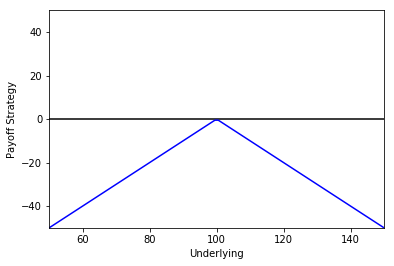

In [19]:
#Payoff Short Straddle

K = 100

x = np.linspace(K - 50, K + 50, 100)

R_payoff = [(- long_call(i, K) - long_put(i, K)) for i in x]

R_abscisse = [0 for i in x]

plt.plot(x, R_abscisse, "k")
plt.plot(x, R_payoff, "b")
plt.ylabel("Payoff Strategy")
plt.xlabel("Underlying")
plt.axis([K - 50, K + 50, -50, 50])
plt.show()

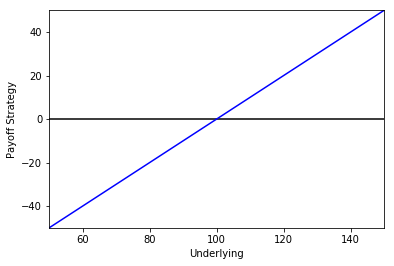

In [20]:
#Payoff Synthetic Long

K = 100

x = np.linspace(K - 50, K + 50, 100)

R_payoff = [(long_call(i, K) - long_put(i, K)) for i in x]

R_abscisse = [0 for i in x]

plt.plot(x, R_abscisse, "k")
plt.plot(x, R_payoff, "b")
plt.ylabel("Payoff Strategy")
plt.xlabel("Underlying")
plt.axis([K - 50, K + 50, -50, 50])
plt.show()

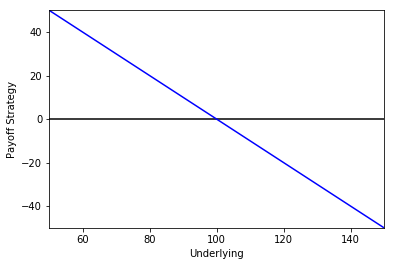

In [21]:
#Payoff Synthetic Short

K = 100

x = np.linspace(K - 50, K + 50, 100)

R_payoff = [( - long_call(i, K) + long_put(i, K)) for i in x]

R_abscisse = [0 for i in x]

plt.plot(x, R_abscisse, "k")
plt.plot(x, R_payoff, "b")
plt.ylabel("Payoff Strategy")
plt.xlabel("Underlying")
plt.axis([K - 50, K + 50, -50, 50])
plt.show()

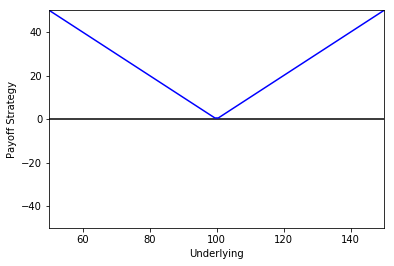

In [22]:
#Payoff Synthetic Straddle (Long 2 Calls + Short Underlying)

K = 100

x = np.linspace(K - 50, K + 50, 100)

R_payoff = [(2 * long_call(i, K) - (i - K)) for i in x]

R_abscisse = [0 for i in x]

plt.plot(x, R_abscisse, "k")
plt.plot(x, R_payoff, "b")
plt.ylabel("Payoff Strategy")
plt.xlabel("Underlying")
plt.axis([K - 50, K + 50, -50, 50])
plt.show()

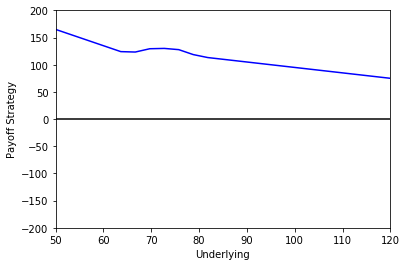

In [51]:
#Payoff Book

x = np.linspace(K - 200, K + 100, 100)


R_payoff = [(-4 * (i - K) + 3 * long_call(i, 65) + 2 * long_call(i, 70) - 6 * long_call(i, 75)  + 4 * long_call(i, 80) \
             + 2 * long_put(i, 65) - 4 * long_put(i, 70) + 3 * long_put(i, 75) - 2 * long_put(i, 80)) for i in x]

R_abscisse = [0 for i in x]

plt.plot(x, R_abscisse, "k")
plt.plot(x, R_payoff, "b")
plt.ylabel("Payoff Strategy")
plt.xlabel("Underlying")
plt.axis([K - 50, K + 20, -200, 200])
plt.show()